# CAR PRICE PREDICTION TASK-3

## Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load Datasets

In [2]:
# Load the CSV file
file_path = r'C:\Users\anand\OneDrive\Desktop\car data.csv'
df = pd.read_csv(file_path)

## Display the first few rows and column names

In [3]:
print("Dataset Preview:")
print(df.head())
print("\nColumn Names:")
print(df.columns)

Dataset Preview:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Column Names:
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


## Data Preprocessing

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [5]:
# Fill or drop missing values if any
df = df.dropna()  # Dropping rows with missing values for simplicity

In [6]:
# Convert categorical columns to numerical
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df['Selling_type'] = df['Selling_type'].map({'Dealer': 0, 'Individual': 1})
df['Transmission'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})

In [7]:
# Feature selection and target variable
X = df[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = df['Selling_Price']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [9]:
# Model Building
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predicting and Evaluating the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Model Evaluation:
Mean Squared Error: 3.531579888971406
R-squared: 0.8466902419662625


## Exploratory Data Analysis (EDA)

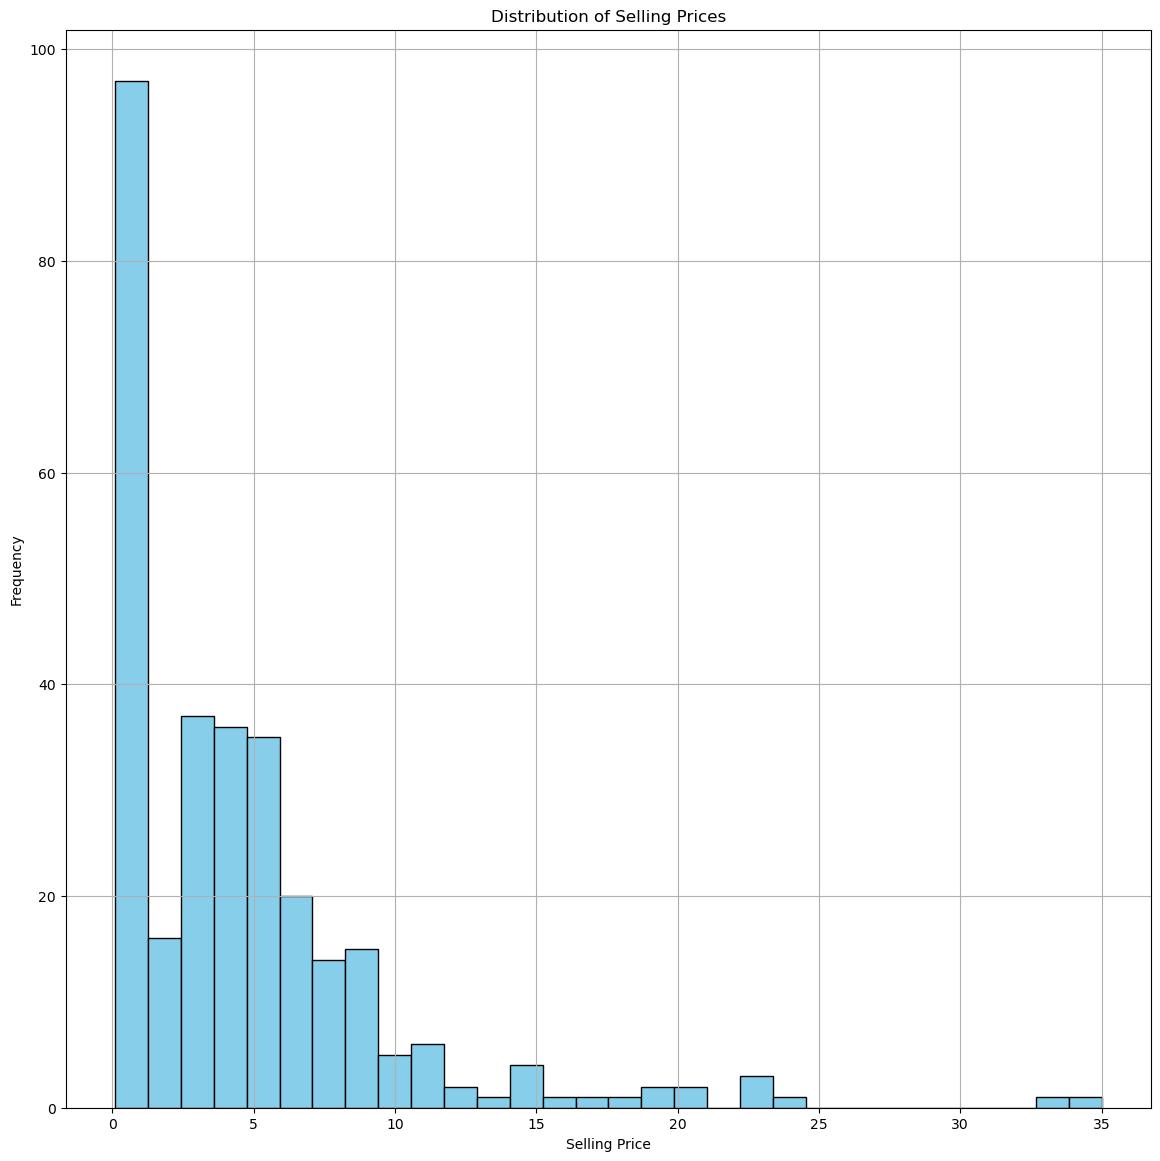

In [21]:
# 1. Histogram of Selling Prices
plt.figure(figsize=(14, 14))
plt.hist(df['Selling_Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

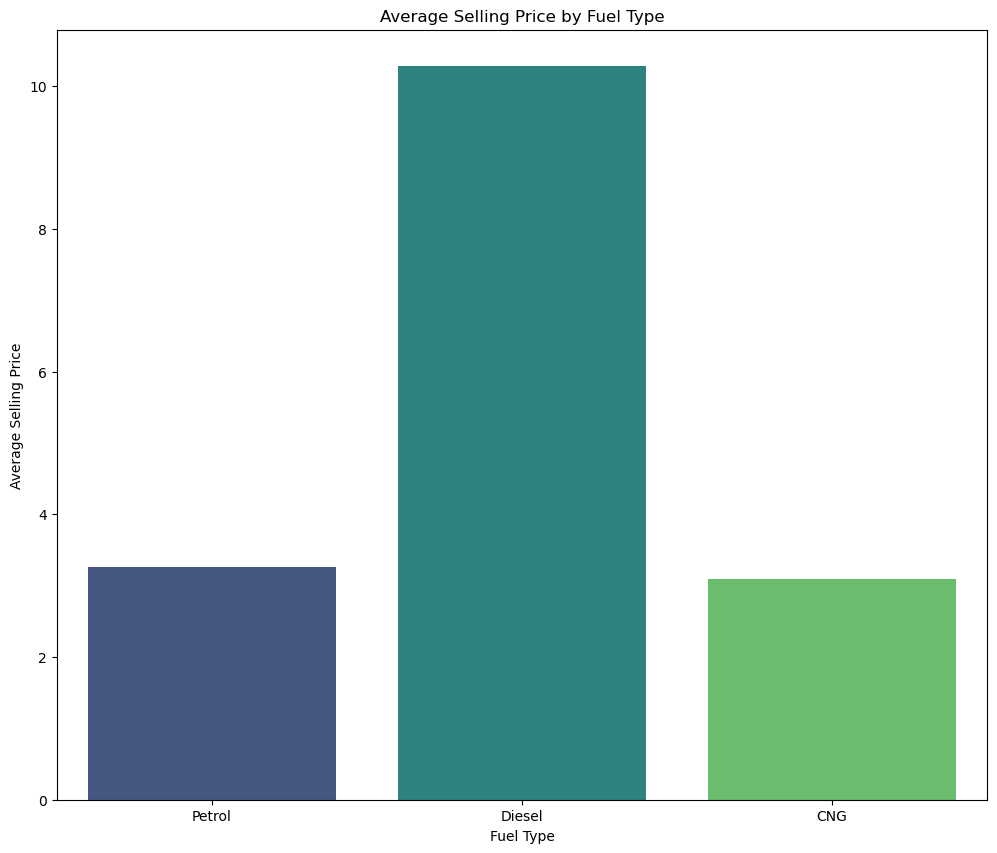

In [34]:
# 2. Bar Plot of Average Selling Price by Fuel Type
plt.figure(figsize=(12, 10))
avg_price_by_fuel = df.groupby('Fuel_Type')['Selling_Price'].mean()
sns.barplot(x=avg_price_by_fuel.index, y=avg_price_by_fuel.values, palette='viridis')
plt.title('Average Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.xticks(ticks=[0, 1, 2], labels=['Petrol', 'Diesel', 'CNG'])
plt.show()

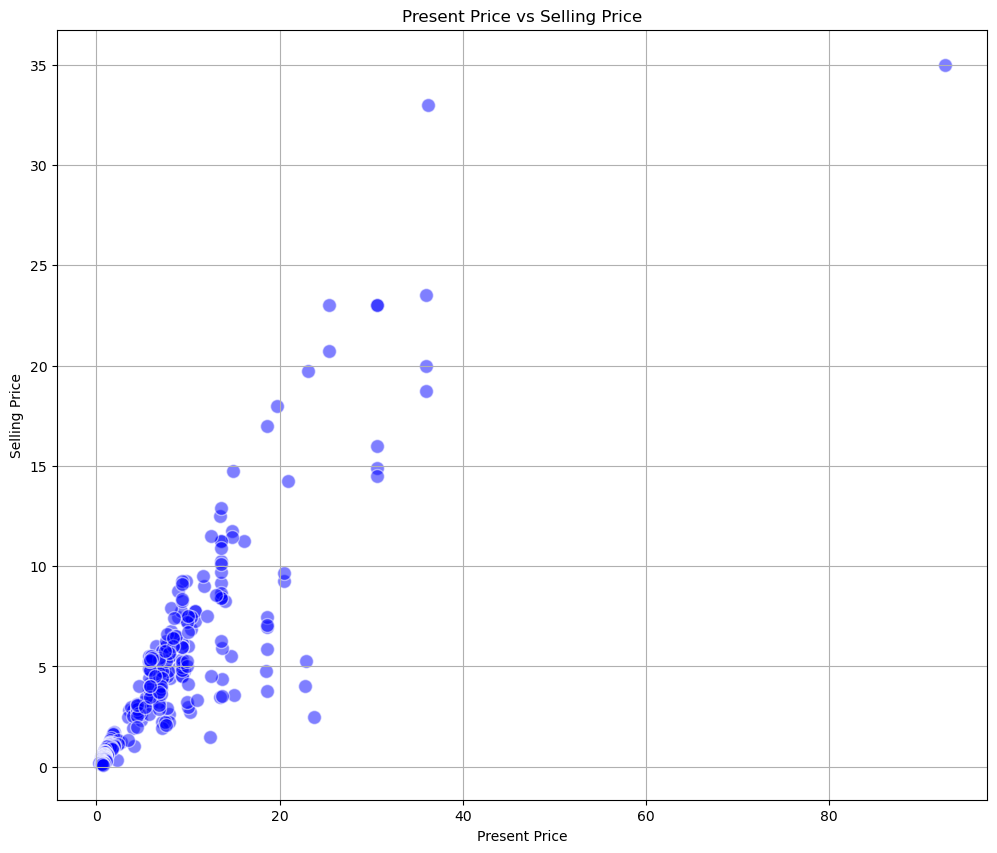

In [33]:
# 3. 2D Plot: Present Price vs Selling Price
plt.figure(figsize=(12, 10))
plt.scatter(df['Present_Price'], df['Selling_Price'], alpha=0.5, c='blue', edgecolors='w', s=100)
plt.title('Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

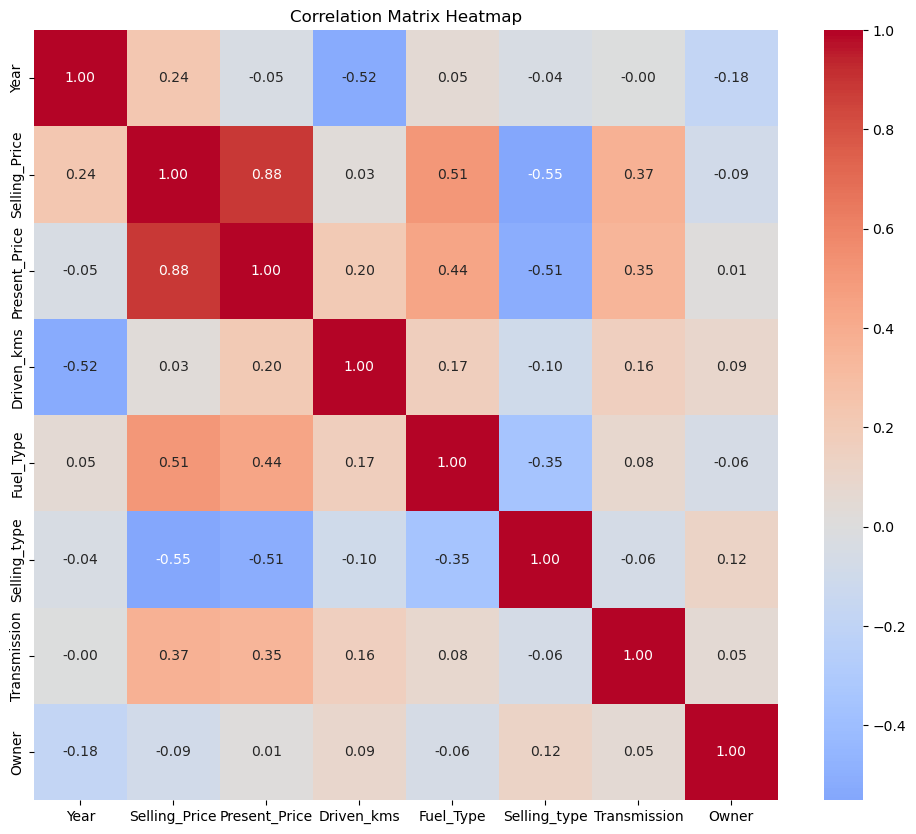

In [31]:
# 4. Heatmap of Correlation Matrix
# Ensure we only include numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


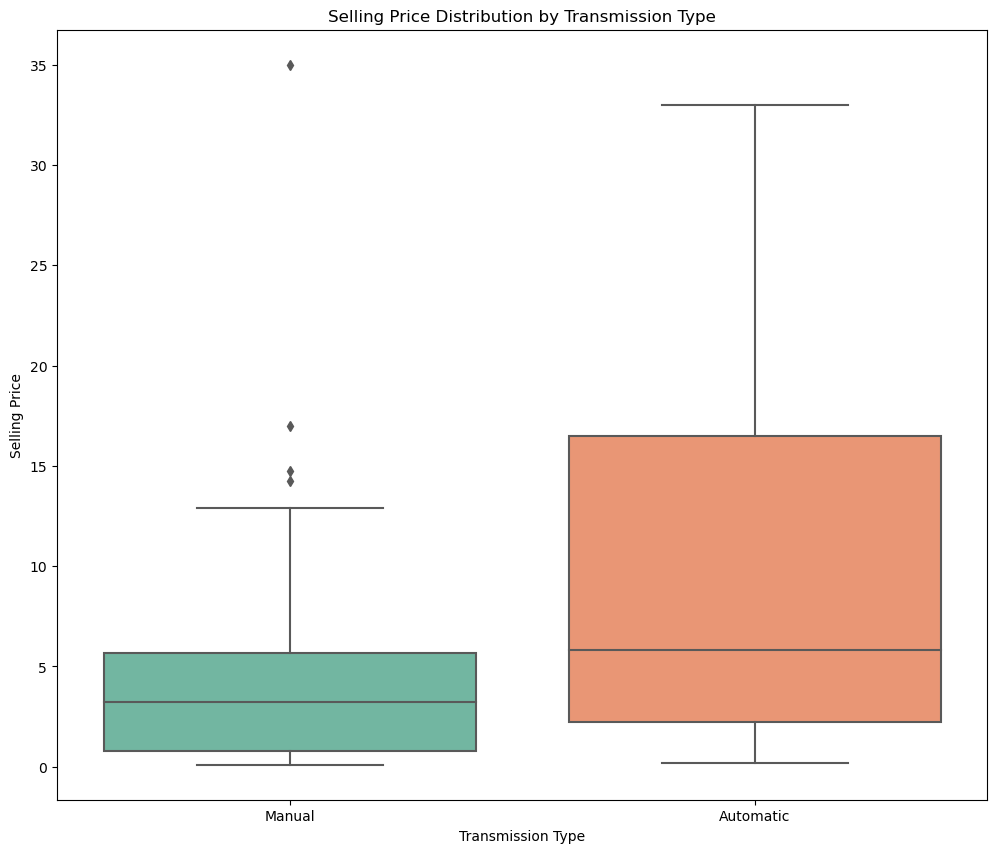

In [32]:
# 5. Box Plot of Selling Price by Transmission
plt.figure(figsize=(12, 10))
sns.boxplot(x='Transmission', y='Selling_Price', data=df, palette='Set2')
plt.title('Selling Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.xticks(ticks=[0, 1], labels=['Manual', 'Automatic'])
plt.show()

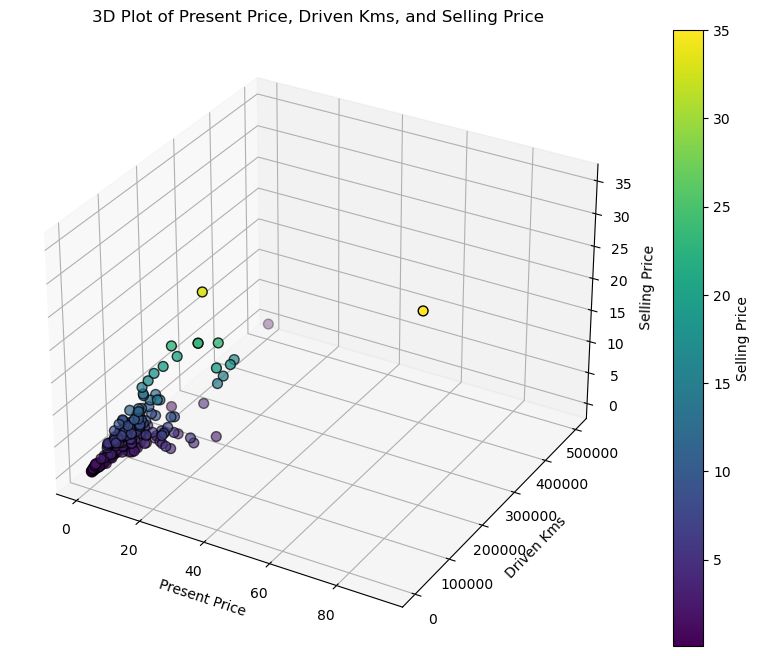

In [35]:
# 6. 3D Plot: Present Price vs Driven kms vs Selling Price
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Extracting data for 3D plot
x = df['Present_Price']
y = df['Driven_kms']
z = df['Selling_Price']

# Scatter plot in 3D
sc = ax.scatter(x, y, z, c=z, cmap='viridis', edgecolor='k', s=50)
ax.set_xlabel('Present Price')
ax.set_ylabel('Driven Kms')
ax.set_zlabel('Selling Price')
ax.set_title('3D Plot of Present Price, Driven Kms, and Selling Price')

# Adding a color bar for reference
plt.colorbar(sc, label='Selling Price')

plt.show()